In [1]:
from networkx.readwrite import json_graph
import networkx as nx
import json
import matplotlib.pyplot as plt
import community as community_louvain

In [2]:
with open("/home/c6/Desktop/OpenWPM/jsons/AST/CDX_results/Graphs/2014/Graph.json", 'rt') as gr:
    g = json.load(gr)

In [3]:
G = json_graph.node_link_graph(g)

In [4]:
print(type(G))

<class 'networkx.classes.graph.Graph'>


In [5]:
# Print number of nodes and edges

In [6]:
print("Number of Nodes: ", len(G.nodes()))
print("Number of Edges: ", len(G.edges()))

Number of Nodes:  1845
Number of Edges:  533639


In [7]:
#Degree calculation

In [8]:
for node_temp in G.nodes():
    wt = 0
    deg = 0
    for nbr, eattr in G.adj[node_temp].items():
        wt = wt + eattr['weight']
        deg += 1
    G.nodes[node_temp]['deg_wt'] = wt
    G.nodes[node_temp]['deg'] = deg

In [9]:
#Degree distrivution

Text(0, 0.5, 'Frequency')

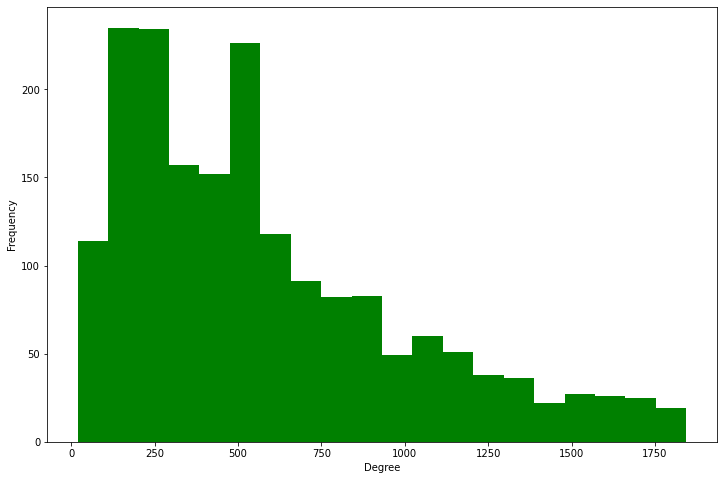

In [10]:
degree_freq = []
for nod in G.nodes:
    degree_freq.append(G.nodes[nod]['deg'])

degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8))
plt.hist(degree_freq, color='green', bins=20)
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [11]:
# Weight Distribution

Text(0, 0.5, 'Frequency')

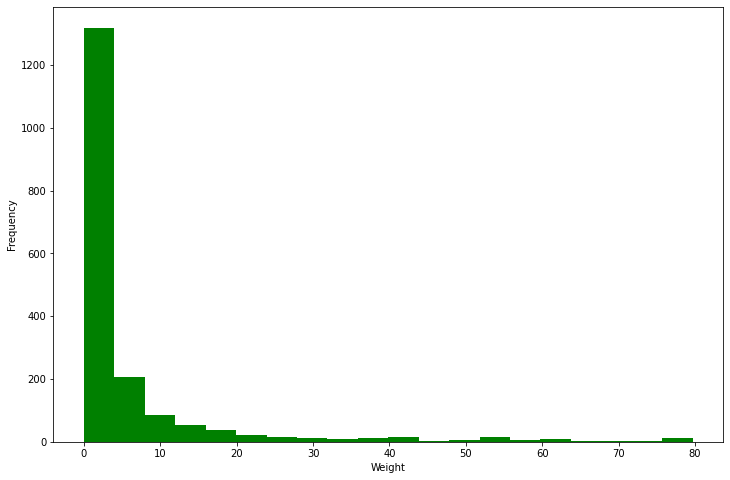

In [12]:
weight_freq = []
for nod in G.nodes:
    weight_freq.append(G.nodes[nod]['deg_wt'])

wt = range(len(weight_freq))
plt.figure(figsize=(12, 8))
plt.hist(weight_freq, color='green', bins=20)
plt.xlabel('Weight')
plt.ylabel('Frequency')

In [13]:
# Degree statistics

In [14]:
# Average degree
print(sum(degree_freq)/len(G.nodes))
print(min(degree_freq))
print(max(degree_freq))

578.470460704607
19
1844


In [15]:
# Weight Statistics
print(sum(weight_freq)/len(G.nodes))
print(min(weight_freq))
print(max(weight_freq))

5.774271584523776
0.008474576271186448
79.67853107344699


In [16]:
# sort nodes based on degree

In [17]:
degree_freq = {}
for nod in G.nodes:
    degree_freq[nod] = G.nodes[nod]['deg']
sorted_degree = dict(sorted(degree_freq.items(), key=lambda item: item[1], reverse=True))
print(sorted_degree)

{'document': 1844, 'name': 1844, 'window': 1844, 'var': 1844, 'location': 1844, 'length': 1836, 'null': 1831, 'init': 1829, 'parent': 1826, 'self': 1826, 'frames': 1826, 'top': 1826, 'opener': 1826, 'push': 1810, 'createElement': 1788, 'type': 1778, 'src': 1776, 'Math': 1763, 'undefined': 1758, 'body': 1750, 'setTimeout': 1747, 'replace': 1747, 'id': 1743, 'navigator': 1741, 'Date': 1731, 'call': 1731, 'prototype': 1723, 'width': 1718, 'onload': 1712, 'Array': 1709, 'appendChild': 1705, 'height': 1704, 'style': 1703, 'readyState': 1703, 'string': 1694, 'getElementsByTagName': 1694, 'join': 1691, 'object': 1688, 'function': 1681, 'data': 1677, 'arguments': 1665, 'apply': 1664, 'addEventListener': 1663, 'href': 1662, 'slice': 1656, 'toString': 1651, 'hasOwnProperty': 1649, 'parentNode': 1647, 'match': 1638, 'getElementById': 1635, 'delete': 1632, 'complete': 1629, 'userAgent': 1628, 'value': 1616, 'documentElement': 1611, 'Object': 1611, 'target': 1610, 'on': 1609, 'attachEvent': 1600, '

In [18]:
# sort nodes based on weight

In [19]:
weight_freq = {}
for nod in G.nodes:
    weight_freq[nod] = G.nodes[nod]['deg_wt']
sorted_weight = dict(sorted(weight_freq.items(), key=lambda item: item[1], reverse=True))
print(sorted_weight)

{'document': 79.67853107344699, 'var': 79.67570621468994, 'name': 79.66195856873891, 'location': 79.64143126177092, 'window': 79.6414312617709, 'parent': 79.59397363465239, 'self': 79.58851224105543, 'top': 79.58851224105543, 'opener': 79.53879472693119, 'frames': 79.53879472693117, 'length': 76.86704331450153, 'src': 74.90885122410597, 'null': 73.74500941619638, 'createElement': 73.35122410546171, 'init': 72.69114877589527, 'getElementsByTagName': 69.25084745762788, 'type': 68.05047080979351, 'push': 67.22109227871998, 'Date': 67.02881355932273, 'appendChild': 62.93766478342691, 'parentNode': 62.81355932203324, 'replace': 62.731638418078454, 'href': 61.20433145009354, 'Math': 60.949529190206576, 'join': 60.69811676082797, 'navigator': 60.11732580037589, 'undefined': 60.00169491525368, 'id': 58.13389830508397, 'setTimeout': 58.119209039547286, 'style': 57.68248587570552, 'body': 57.51996233521595, 'height': 56.379661016948546, 'true': 56.153860640300756, 'toString': 55.65800376647773, 

In [20]:
# Check whether the graph is connected

In [21]:
nx.is_connected(G)

True

In [22]:
# Clustering Coefficient

In [23]:
nx.average_clustering(G)

0.8221052221995537

In [24]:
# average_shortest_path_length

In [25]:
nx.average_shortest_path_length(G)

1.6862958456048769

In [26]:
#Lovain methof

In [27]:
partition = community_louvain.best_partition(G, resolution=0.88, weight='weight')

In [28]:
# number of partinions

In [29]:
num_of_partitions = len(set(partition.values()))
print(num_of_partitions)

16


In [30]:
api_hash_fract = {}
for key, value in partition.items():
    api_hash_fract[key] = value
louvain_clusters = {}
for i in range(num_of_partitions):
    clust = []
    for key, value in api_hash_fract.items():
        if value == i:
            clust.append(key)
    louvain_clusters[i] = clust
for i in range(num_of_partitions):
    print(len(louvain_clusters[i]))

187
89
26
51
405
157
26
23
3
14
1
305
249
145
163
1


In [31]:
with open("Lovain_clusters.json", 'w') as l:
    json.dump(louvain_clusters,l, indent=4)
